<a href="https://colab.research.google.com/github/SolemnShark871/Churn/blob/main/SVM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !pip install pandas-profiling==2.7.1

## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA


## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Churn') #Thomas & Favio & Juan
os.listdir("./")


df_lamda = pd.read_csv('not_scaled_not_pca_merged.csv', index_col = [0])

df_lamda.head()

Mounted at /content/drive


,PERSONA,AC_TP,ADM_TP,AI_TP,AP_TP,CO_TP,CU_TP,GC_TP,HD_TP,IN_TP,LI_TP,NE_TP,OP_TP,PD_TP,PM_TP,PR_TP,RE_TP,SE_TP,SM_TP,SO_TP,TD_TP,ASIGNACIONES_FACTURADAS,ASIGNACIONES_NO_FACTURADAS,AC_HR,ADM_HR,AI_HR,AP_HR,CO_HR,CU_HR,GC_HR,HD_HR,IN_HR,LI_HR,NE_HR,OP_HR,PD_HR,PM_HR,PR_HR,RE_HR,SE_HR,...,CU_PN,GC_PN,HD_PN,IN_PN,LI_PN,NE_PN,OP_PN,PD_PN,PM_PN,PR_PN,RE_PN,SE_PN,SM_PN,SO_PN,TD_PN,AC_RS,ADM_RS,AI_RS,AP_RS,CO_RS,CU_RS,GC_RS,HD_RS,IN_RS,LI_RS,NE_RS,OP_RS,PD_RS,PM_RS,PR_RS,RE_RS,SE_RS,SM_RS,SO_RS,TD_RS,EDAD,GENERO,TIEMPO_EMP,LAMBDA,LABEL
185,843,0,19,0,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,19,0.0,295.50,0.0,1656.51,41.5,0,0,0.0,0.0,0,0.0,0.00,0.0,0.00,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,1,13,13.335903,1
549,1368,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0.0,1012.19,0.0,0.00,0.0,0,0,0.0,0.0,0,0.0,0.00,0.0,3.83,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1,6,13.335903,1
971,21,0,29,1,10,0,0,0,0,0,0,0,0,0,5,0,0,0,25,0,0,21,13,0.0,214.25,0.0,365.49,0.0,0,0,0.0,0.0,0,0.0,0.00,0.0,50.50,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1575,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,224,0,0,40,0,192,46.694458,0
80,571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,271.50,0.0,113.00,292.0,0,0,0.0,0.0,0,0.0,628.00,0.0,0.00,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,22,23.737822,1
886,2019,0,23,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,8,12,0.0,152.92,0.0,0.00,0.0,0,0,0.0,0.0,0,0.0,1803.51,0.0,0.00,0.0,0,0.0,...,0,0,0,0,0,0,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,0,0,0,0,0,0,0,0,27,0,13,23.737822,1


# SVM models

TODO 

  - Split the data into test & train 
  - Cross validation? K-folds
  - Data augmentation (?) 
  - PCA 
      - Is this a new dataset?
      - How many components 


  $F$: copy from ML the TT split, we also need to do cross val

  $T$:  


# SVM (from ML challenge)

In [9]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_lamda.drop('LABEL',axis = 1)
y = df_lamda['LABEL']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(principalComponents, y, test_size=0.8, random_state=1234, stratify = y)

In [ ]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.1,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__decision_function_shape=['ovo', 'ovr'])

In [ ]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train1,y_train1)

print(grid_search.best_params_)
print(grid_search.best_params_)

In [ ]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch

rbf = svm.SVC(kernel = 'rbf',C= 0.1, decision_function_shape ='ovr', random_state=1234)
rbf.fit(X_train, y_train)

#### PCA (Run this afterwards)

In [ ]:
# ##apply PCA to reduce the number of features
# pca = PCA(n_components=25)
# principalComponents = pca.fit_transform(X)

#### Results (performance)

In [ ]:
# retrieve the accuracy
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

In [ ]:
y_pred = rbf.predict(X_test)

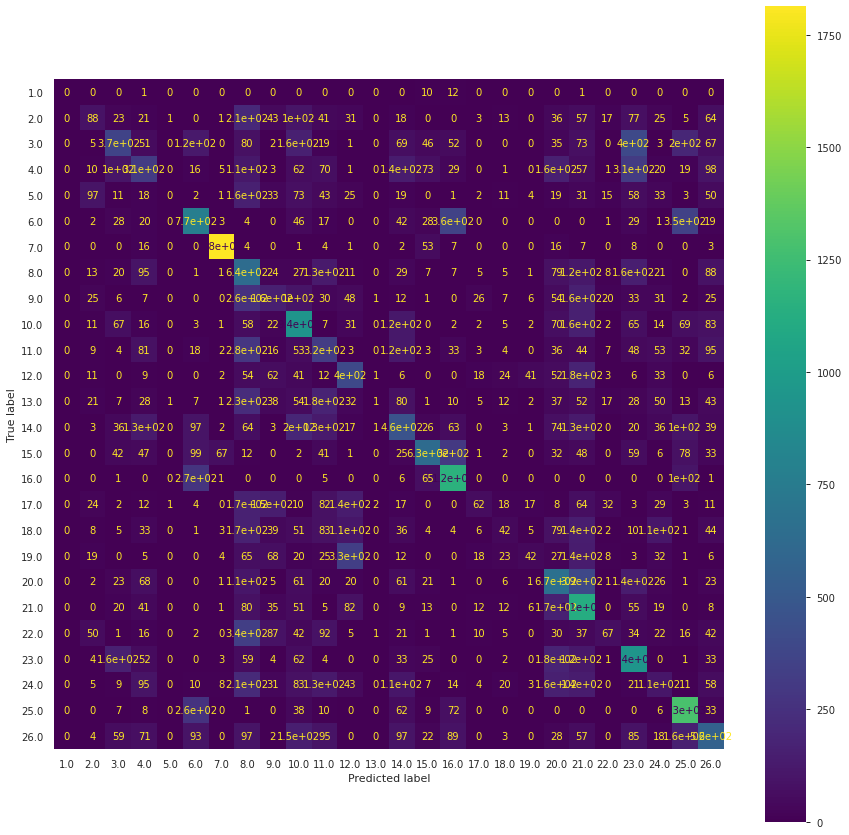

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbf.classes_)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(rbf, X_test, y_test, ax=ax)

plt.show()

In [ ]:
print("DecisionTrees's F1_Score: ", metrics.f1_score(y_test, y_pred))

ValueError: ignored